In [1]:
import numpy as np
import cmath as cm
import matplotlib.pyplot as plt

import matplotlib as mpl
import matplotlib.ticker as ticker
mpl.rcParams.update({
    'font.family' : 'STIXGeneral',
    'mathtext.fontset' : 'stix',
    'font.size' : 17,
    'xtick.major.size' : 5.5 ,
    'xtick.minor.size' : 3 ,
    'xtick.major.width' : 1.2 ,
    'xtick.minor.width' : 1.2 ,
    'xtick.labelsize' : 15 ,
    'xtick.direction' : 'in' ,
    'xtick.top' : True ,
    'ytick.major.size' : 5.5 ,
    'ytick.minor.size' : 3 ,
    'ytick.major.width' : 1.2 ,
    'ytick.minor.width' : 1.2 ,
    'ytick.labelsize' : 15 ,
    'ytick.direction' : 'in' ,
    'xtick.major.pad' : 8 ,
    'xtick.minor.pad' : 8 ,
    'ytick.major.pad' : 5 ,
    'ytick.minor.pad' : 5 ,
    'ytick.right' : True ,
    'savefig.dpi' : 600 ,
    'axes.unicode_minus' : False ,
    'axes.linewidth' : 1.2 ,
    'lines.linewidth' : 1.5,
    'legend.frameon' : False,
    'legend.fontsize' : 13,
    'legend.handlelength' : 1.5
})

## 6.5

In [2]:
R1 = R3 = R5 = 1000
R2 = R4 = R6 = 2000
C1 = 1e-6
C2 = 0.5 * 1e-6
Xp = 3
w = 1000

In [3]:
A = np.array([[1/R1 + 1/R4 + 1j*w*C1, -1j*w*C1, 0],
           [-1j*C1, 1/R2 + 1/R5 + 1j*w*C1 + 1j*w*C2, -1j*w*C2],
           [0, -1j*w*C2, 1/R3 + 1/R6 + 1j*w*C2]], complex)
b = np.array([Xp/R1, Xp/R1, Xp/R3], complex)
x = np.linalg.solve(A, b)
x

array([2.13070896-0.48729218j, 1.39977069-0.68335563j,
       2.14498376-0.24840436j])

In [4]:
for i in range (3):
    r, theta = cm.polar(x[i])
    print(r, theta)

2.1857205574030876 -0.22483292660227916
1.5576690558154707 -0.45415595945085463
2.159319346933402 -0.11529352298203277


## 6.12

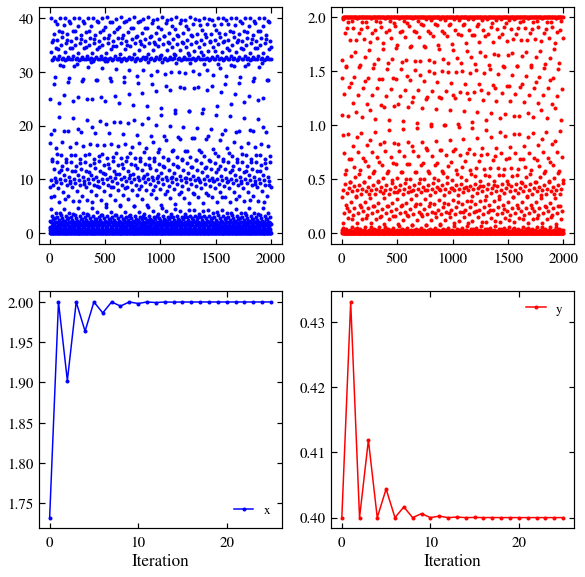

In [12]:
acc = 1e-6
N = 2000
a = 1
b = 2


fig, ax = plt.subplots(2, 2, figsize=(9.6, 9.6))
x0 = 0.5
y0 = 0.5
x, y = np.zeros(N), np.zeros(N)
for i in range (N):
    x1, y1 = x0, y0
    x0, y0 = y1*(a+x1**2), b/(a+x1**2)
    dx = np.abs((x0-x1)/x1)
    dy = np.abs((y0-y1)/y1)
    x[i], y[i] = x0, y0
    if (dx < acc and dy < acc) : break
ax[0,0].plot(np.arange(i+1), x[:i+1], 'b.', label='x')
ax[0,1].plot(np.arange(i+1), y[:i+1], 'r.', label='y')

x0 = 0.5
y0 = 0.5
x, y = np.zeros(N), np.zeros(N)
for i in range (N):
    x1, y1 = x0, y0
    x0, y0 = np.sqrt(b/y1 - a), x1/(a+x1**2)
    dx = np.abs((x0-x1)/x1)
    dy = np.abs((y0-y1)/y1)
    x[i], y[i] = x0, y0
    if (dx < acc and dy < acc) : break
ax[1,0].plot(np.arange(i+1), x[:i+1], 'b.-', label='x')
ax[1,1].plot(np.arange(i+1), y[:i+1], 'r.-', label='y')
ax[1,0].set_xlabel('Iteration')
ax[1,1].set_xlabel('Iteration')
ax[1,0].legend()
ax[1,1].legend()

plt.savefig('6_12.png', bbox_inches='tight')

## 6.14

In [14]:
acc = 0.001 / e
def even(x):
    return y1(x) - y2(x)
def odd(x):
    return y1(x) - y3(x)

def binary_srch(f, a, b):
    half = lambda x,y: (x+y)/2
    if f(a)*f(b)>0 : return np.nan
    for i in range (5000):
        x = half(a,b)
        if f(a)*f(x)>0 : a = x
        elif f(b)*f(x)>0 : b = x
        elif np.abs(a-b)<acc : break
    return x

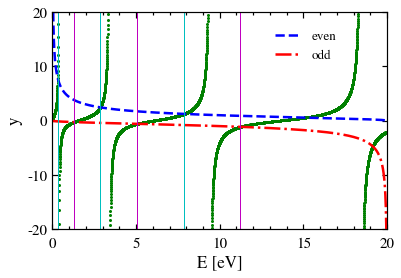

In [24]:
m = 9.1094*1e-31 # kg
V = 20 # eV
w = 1e-9 # m
hbar = 6.58212*1e-16 # eV s
e = 1.60218*1e-19

def y1(E):
    return np.tan(np.sqrt((w**2*m*E)/(2*hbar**2*e)))
def y2(E):
    return np.sqrt((V-E)/E)
def y3(E):
    return -np.sqrt(E/(V-E))

E = np.linspace(0.01, 19.99, 5000)
plt.plot(E, y1(E), 'g.', ms = 4)
plt.plot(E, y2(E), 'b--', lw = 2.5, label='even')
plt.plot(E, y3(E), 'r-.', lw = 2.5, label='odd')

plt.axvline(binary_srch(even, 0.1, 0.35), c='c',lw=1)
plt.axvline(binary_srch(even, 2, 3), c='c',lw=1)
plt.axvline(binary_srch(even, 6, 9), c='c',lw=1)

plt.axvline(binary_srch(odd, 1, 2), c='m',lw=1)
plt.axvline(binary_srch(odd, 4, 7), c='m',lw=1)
plt.axvline(binary_srch(odd, 10, 15), c='m',lw=1)



plt.legend(loc=(0.65, 0.75), handlelength=2)
plt.ylim(-20, 20)
plt.xlim(0, 20)
plt.xlabel('E [eV]')
plt.ylabel('y')

ax = plt.gca()
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

plt.savefig('6_14.png', bbox_inches='tight')

In [15]:
print("0", binary_srch(even, 0.1, 0.35))
print("2", binary_srch(even, 2, 3))
print("4", binary_srch(even, 6, 9))

print("1", binary_srch(odd, 1, 2))
print("3", binary_srch(odd, 4, 7))
print("5", binary_srch(odd, 10, 15))

0 0.3179391985394834
2 2.851027531079845
4 7.849850623922421
1 1.2700782665869288
3 5.050418531633605
5 11.215101787914477


## 6.16

2.696586e+08
3.072449e+08
3.231959e+08
3.267319e+08
3.269033e+08
3.269037e+08
3.269037e+08
3.269037e+08
0.8504258578376848


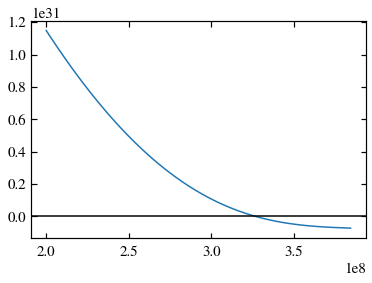

In [25]:
G = 6.674*1e-11
M = 5.974*1e24
m = 7.348*1e22
R = 3.844*1e8
w = 2.622*1e-6

acc = 1e-8

def f(r):
    return G*(M*(R-r)**2 - m*r**2) - w**2 * r**3 * (R-r)**2
def df(r):
    return -2*G*(M*(R-r) + m*r) + w**2 * r**2 * (R-r) * (5*r - 3*R)
plt.plot(np.linspace(2e8, R), f(np.linspace(2e8, R)))
plt.axhline(0, c='k')
x = 0.5*R
d = 1
while np.abs(d)>acc:
    d = f(x)/df(x)
    x = x - d
    print("%.6e"%x)
print(x / R)